In [ ]:
!pip install wandb

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import wandb
from wandb.keras import WandbCallback

In [ ]:
wandb.init(project='cifar10')

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
config = wandb.config
config.learning_rate = 0.001

## dataset

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size= 0.1)

# normalizaition
X_train = X_train / 255.0
X_test = X_test / 255.0

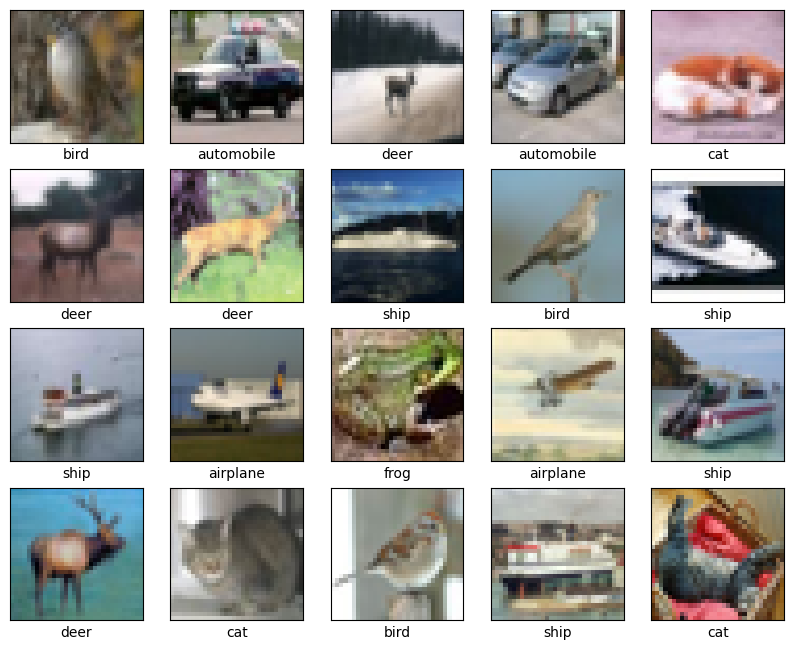

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
               'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

## CNN + MLP

In [ ]:
from keras.api._v2.keras import activations
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(config.learning_rate),
              loss= tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
)

In [ ]:
model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val), callbacks=[WandbCallback()])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
1406/1407 [============================>.] - ETA: 0s - loss: 1.5474 - accuracy: 0.4308

wandb: Adding directory to artifact (/content/wandb/run-20230709_214749-upi55kgi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 74s 52ms/step - loss: 1.5474 - accuracy: 0.4308 - val_loss: 227.8092 - val_accuracy: 0.3560
Epoch 2/10
1406/1407 [============================>.] - ETA: 0s - loss: 1.1621 - accuracy: 0.5851

wandb: Adding directory to artifact (/content/wandb/run-20230709_214749-upi55kgi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 71s 50ms/step - loss: 1.1620 - accuracy: 0.5851 - val_loss: 195.1163 - val_accuracy: 0.4170
Epoch 3/10
1407/1407 [==============================] - 71s 51ms/step - loss: 1.0151 - accuracy: 0.6429 - val_loss: 196.3476 - val_accuracy: 0.4020
Epoch 4/10
1406/1407 [============================>.] - ETA: 0s - loss: 0.9222 - accuracy: 0.6760

wandb: Adding directory to artifact (/content/wandb/run-20230709_214749-upi55kgi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 71s 50ms/step - loss: 0.9221 - accuracy: 0.6761 - val_loss: 193.7650 - val_accuracy: 0.4336
Epoch 5/10
1406/1407 [============================>.] - ETA: 0s - loss: 0.8575 - accuracy: 0.6987

wandb: Adding directory to artifact (/content/wandb/run-20230709_214749-upi55kgi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 71s 50ms/step - loss: 0.8576 - accuracy: 0.6986 - val_loss: 173.1741 - val_accuracy: 0.4646
Epoch 6/10
1407/1407 [==============================] - 71s 50ms/step - loss: 0.8054 - accuracy: 0.7169 - val_loss: 251.9911 - val_accuracy: 0.3808
Epoch 7/10
1407/1407 [==============================] - 69s 49ms/step - loss: 0.7512 - accuracy: 0.7351 - val_loss: 296.3394 - val_accuracy: 0.3484
Epoch 8/10
1407/1407 [==============================] - 68s 48ms/step - loss: 0.7068 - accuracy: 0.7531 - val_loss: 227.9774 - val_accuracy: 0.4480
Epoch 9/10
1407/1407 [==============================] - 69s 49ms/step - loss: 0.6702 - accuracy: 0.7624 - val_loss: 238.5998 - val_accuracy: 0.4370
Epoch 10/10
1407/1407 [==============================] - 70s 50ms/step - loss: 0.6350 - accuracy: 0.7750 - val_loss: 240.5344 - val_accuracy: 0.4490


In [ ]:
model.save('CNN_cifar10.h5')

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9262 - accuracy: 0.6908


[0.9262337684631348, 0.6908000111579895]

## MLP

In [ ]:
model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer= 'Adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [ ]:
model.fit(X_train, Y_train, epochs=10, callbacks=[WandbCallback()])

Epoch 1/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8868 - accuracy: 0.3236
Epoch 2/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7375 - accuracy: 0.3781
Epoch 3/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6870 - accuracy: 0.3982
Epoch 4/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6483 - accuracy: 0.4133
Epoch 5/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6238 - accuracy: 0.4238
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6127 - accuracy: 0.4275
Epoch 7/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5928 - accuracy: 0.4328
Epoch 8/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5810 - accuracy: 0.4384
Epoch 9/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5759 - accuracy: 0.4396
Epoch 10/10
1407/1407 [==============================] - 12s 9ms/step - lo

In [ ]:
model.save('MLP_cifar10.h5')

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6270 - accuracy: 0.4222


[1.6270197629928589, 0.4221999943256378]